In [91]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [68]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,...,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,0,0,1PT,22.8,3,0.0,0,0,0,...,1824.6,3,51.6,36.6,14.4,0,2048.5,4,Down,0
1,1,1,1,2PT,44.9,4,0.0,0,0,0,...,1737.5,0,40.8,7.2,17.8,0,1753.1,4,Up,0


In [69]:
df_ROS_AP = df_ROS[['신장','체중','종양진행여부','혈전합병증여부','수술기법','재발여부','입원기간']]
df_ROS_AP

,신장,체중,종양진행여부,혈전합병증여부,수술기법,재발여부,입원기간
0,163,60.3,0,0,TELD,0,2
1,171,71.7,0,0,TELD,0,1
2,178,77.1,0,0,TELD,0,1
3,174,74.2,0,0,TELD,0,1
4,183,80.7,0,0,TELD,0,2
...,...,...,...,...,...,...,...
1739,163,52.0,0,0,TELD,0,12
1740,185,64.0,0,0,TELD,0,2
1741,160,60.0,0,0,TELD,0,3
1742,173,70.0,0,0,TELD,0,3


####  6. BMI 범주여부와 입원기간/ BMI범주(항목 3), 입원기간(비정규분포) - Kruskal Test

- 귀무가설: BMI 범주에 따라 입원기간이 동일하다.
- 대립가설: BMI 범주에 따라 입원기간이 다르다.
- 분석결론:
    - 통계결론:  p-value가 0.05보다 크므로 대립가설이 성립되지 않는다. 
    - 사실결론:  BMI 범주에 따른 입원기간이 관련이 없다.  

In [70]:
df_ROS_BMI = df_ROS_AP[['신장','체중']]
df_ROS_BMI[:10]
def Calculate_BMI(row):
    height = float(row['신장']) / 100 
    weight = float(row['체중'])
    BMI = weight / (height * height)
    return BMI
df_ROS_BMI['BMI'] = df_ROS_BMI.apply(Calculate_BMI, axis=1)
df_ROS_BMI['BMI']
df_ROS_BMI['BMI_범주'] = pd.cut(df_ROS_BMI['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                               labels=['저체중', '정상 체중', '과체중', '비만'])
df_ROS_ad = df_ROS[['입원일자', '입원기간','퇴원일자']]
df_ROS_AP_subset = df_ROS_ad[['입원일자','퇴원일자', '입원기간']]
df_ROS_AP_subset['BMI_범주'] = df_ROS_BMI['BMI_범주']
df_BMI= df_ROS_AP_subset[['BMI_범주', '입원기간', '입원일자', '퇴원일자']]
df_Ba = df_BMI['입원기간'].describe()['25%']
df_Bb = df_BMI['입원기간'].describe()['75%']
df_Ba_IQR = df_Bb - df_Ba
df_Ba, df_Bb, df_Ba_IQR
df_Ba_up = df_Bb + 1.5 * df_Ba_IQR
df_Ba_down = df_Ba - 1.5 * df_Ba_IQR
df_Ba_up, df_Ba_down
df_B_condition = (df_BMI['입원기간'] <= df_Ba_up) & (df_BMI['입원기간'] >= df_Ba_down)
df_ROS = df_ROS[df_B_condition]
df_BMI =  df_BMI[df_B_condition]
df_BMI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   BMI_범주  1684 non-null   category
 1   입원기간    1684 non-null   int64   
 2   입원일자    1684 non-null   int64   
 3   퇴원일자    1684 non-null   int64   
dtypes: category(1), int64(3)
memory usage: 54.5 KB


C:\Users\04-02\AppData\Local\Temp\ipykernel_6912\3603340826.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_BMI['BMI'] = df_ROS_BMI.apply(Calculate_BMI, axis=1)
C:\Users\04-02\AppData\Local\Temp\ipykernel_6912\3603340826.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_BMI['BMI_범주'] = pd.cut(df_ROS_BMI['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
C:\Users\04-02\AppData\Local\Temp\ipykernel_6912\3603340826.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [71]:
df_BMI

,BMI_범주,입원기간,입원일자,퇴원일자
0,정상 체중,2,20190713,20190716
1,정상 체중,1,20190715,20190716
2,정상 체중,1,20190729,20190801
3,정상 체중,1,20190731,20190803
4,정상 체중,2,20190903,20190907
...,...,...,...,...
1738,비만,2,20170221,20170222
1740,정상 체중,2,20170316,20170317
1741,정상 체중,3,20170928,20170930
1742,정상 체중,3,20170604,20170606


<Axes: xlabel='입원기간', ylabel='Count'>

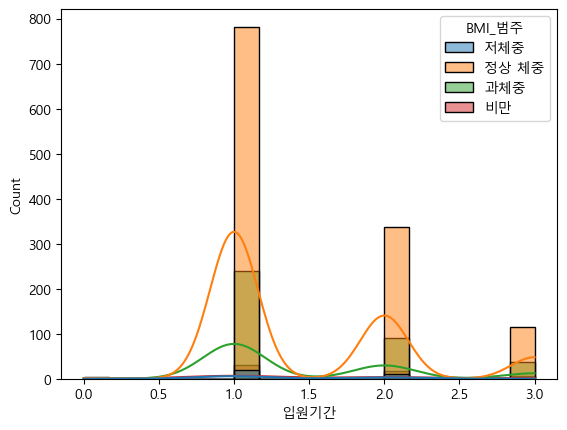

In [95]:
sns.histplot(data=df_BMI, x='입원기간', kde=True, hue='BMI_범주')

In [96]:
df_BMI['BMI_범주'].value_counts()

정상 체중    1235
과체중       367
비만         52
저체중        30
Name: BMI_범주, dtype: int64

In [97]:
condition = (df_BMI['BMI_범주'] == '저체중') | (df_BMI['BMI_범주'] == '정상 체중') | (df_BMI['BMI_범주'] == '과체중')| (df_BMI['BMI_범주'] == '비만')
df_BMI_BW = df_BMI[condition][['BMI_범주','입원기간']]

In [98]:
df_BMI_BW.isnull().sum()

BMI_범주    0
입원기간      0
dtype: int64

In [101]:
df_BMI_BW[:2]

,BMI_범주,입원기간
0,정상 체중,2
1,정상 체중,1


##### 정규성 확인
 - 5천이상이므로 anderson test 사용
 - statistic < cv : 정규, statistic > cv : 비정규

<Axes: xlabel='입원기간', ylabel='Count'>

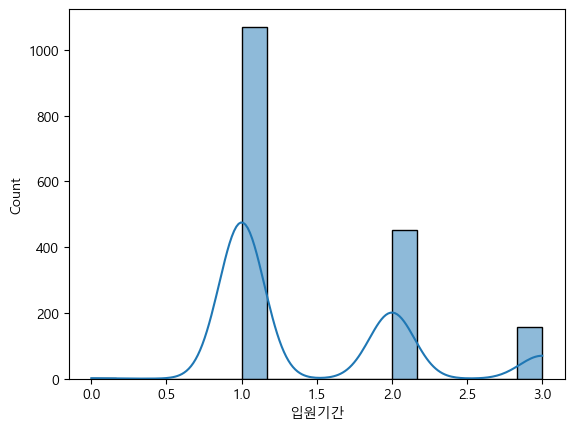

In [102]:
sns.histplot(data=df_BMI_BW, x='입원기간', kde=True)

In [103]:
statistic, cv, sl = stats.anderson(df_BMI_BW['입원기간'])
statistic, cv, sl

(245.9186541738968,
 array([0.575, 0.654, 0.785, 0.916, 1.089]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

In [104]:
#type(df_channel4_amount['channel'].value_counts())
df_BMI_BW_list = df_BMI_BW['BMI_범주'].value_counts().index.to_list()
df_BMI_BW_list

['정상 체중', '과체중', '비만', '저체중']

In [105]:
df_result = [] # list()
for item in df_BMI_BW_list :
    condition = (df_BMI_BW['BMI_범주'] == item)
    df_result.append(df_BMI_BW[condition])   # list index에 DataFrame
    # df_result.append(df_channel4_amount[condition]['amount'])   # list index에 Serise    

In [106]:
#len(df_result)
df_result[3][:2]

,BMI_범주,입원기간
632,저체중,2
660,저체중,1


In [108]:
### 검증 각 변수 4개 
stats.kruskal(df_BMI['입원기간'], df_result[1]['입원기간'], df_result[2]['입원기간'], df_result[3]['입원기간'])

KruskalResult(statistic=1.4216777687372197, pvalue=0.700461301724873)

#### 7. 종양진행여부와 입원기간
- 귀무가설: 종양진행여부에 따라 입원기간이 달라지지 않는다.
- 대립가설: 종양진행여부에 따라 입원기간이 달라진다
- 분석결론:
    - 통계결론: p-value가 0.05보다 작으므로 대립가설이 성립한다.
    - 사실결론: 종양진행여부에 따라 입원기간이 달라진다.

In [52]:
df_Tumor = df_ROS[['종양진행여부', '입원기간']]
df_Tumors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종양진행여부  1684 non-null   int64
 1   입원기간    1684 non-null   int64
 2   입원일자    1684 non-null   int64
 3   퇴원일자    1684 non-null   int64
dtypes: int64(4)
memory usage: 65.8 KB


In [53]:
stats.stats.kruskal(df_Tumors['종양진행여부'], df_Tumors['입원기간'])

C:\Users\04-02\AppData\Local\Temp\ipykernel_6912\1222396320.py:1: DeprecationWarning: Please use `kruskal` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.stats.kruskal(df_Tumors['종양진행여부'], df_Tumors['입원기간'])


KruskalResult(statistic=2983.1195014046457, pvalue=0.0)

#### 8. 혈전합병증여부와 입원기간
- 귀무가설: 혈전합병증여부에 따라 입원기간이 달라지지 않는다.
- 대립가설: 혈전합병증여부에 따라 입원기간이 달라진다
- 분석결론:
    - 통계결론: p-value가 0.05보다 작으므로 대립가설이 성립한다.
    - 사실결론: 혈전합병증여부에 따라 입원기간이 달라진다.

In [51]:
df_thrombus = df_ROS[[ '혈전합병증여부','입원기간']]
df_thrombus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   혈전합병증여부  1684 non-null   int64
 1   입원기간     1684 non-null   int64
dtypes: int64(2)
memory usage: 39.5 KB


In [13]:
stats.stats.kruskal(df_thrombus['혈전합병증여부'], df_thrombus['입원기간'])

KruskalResult(statistic=2985.8549227357184, pvalue=0.0)

#### 9. 수술기법과 입원기간 (수술기법(항목 2), 입원기간(비정규분포) - Wilcoxon Test)
- 귀무가설: 수술기법에 따라 입원기간이 달라지지 않는다.
- 대립가설: 수술기법에 따라 입원기간이 달라진다
- 분석결론:
    - 통계결론: p-value가 0.05보다 크므로 대립가설이 성립한다.
    - 사실결론: 수술기법에 따라 입원기간은 관련이 없다. 

In [15]:
df_surgicaltechnique = df_ROS[['수술기법', '입원기간']]
df_surgicaltechnique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   수술기법    1684 non-null   object
 1   입원기간    1684 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.5+ KB


<Axes: xlabel='수술기법', ylabel='count'>

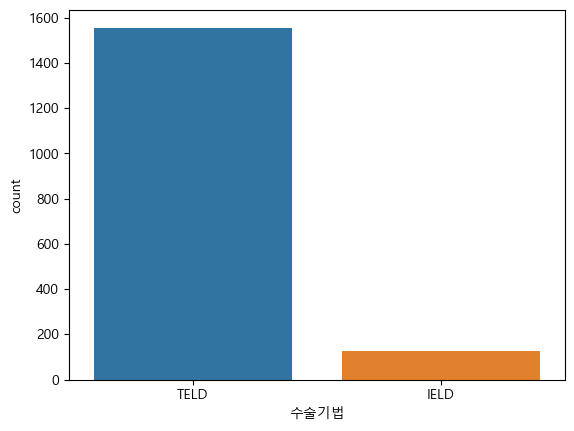

In [109]:
sns.countplot(data=df_surgicaltechnique, x='수술기법')

In [110]:
df_surgicaltechnique['수술기법'].value_counts()

TELD    1557
IELD     127
Name: 수술기법, dtype: int64

In [111]:
## 검증 대상 항목만 필터링 and 추출
condition = (df_surgicaltechnique['수술기법'] == 'IELD') | (df_surgicaltechnique['수술기법'] == 'TELD')
df_surgicaltechnique_F = df_surgicaltechnique[condition][['수술기법','입원기간']]
df_surgicaltechnique_F[:2]

,수술기법,입원기간
0,TELD,2
1,TELD,1


In [112]:
## check null
df_surgicaltechnique_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   수술기법    1684 non-null   object
 1   입원기간    1684 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.5+ KB


In [114]:
## statistic < cv : 정규분포, statistic > cv : 비정규분포
statistic, cv, sl = stats.anderson(df_surgicaltechnique_F['입원기간'])
statistic, cv, sl  # 비정규분포

(245.9186541738968,
 array([0.575, 0.654, 0.785, 0.916, 1.089]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

In [115]:
df_surgicaltechnique_F['수술기법'].value_counts()

TELD    1557
IELD     127
Name: 수술기법, dtype: int64

In [116]:
df_TELD = df_surgicaltechnique_F[df_surgicaltechnique_F['수술기법'] == 'TELD']
df_TELD[:2]

,수술기법,입원기간
0,TELD,2
1,TELD,1


In [117]:
df_IELD = df_surgicaltechnique_F[df_surgicaltechnique_F['수술기법'] == 'IELD']
df_IELD[:2]

,수술기법,입원기간
19,IELD,1
30,IELD,1


In [118]:
# 검증
stats.ranksums(df_TELD['수술기법'],df_IELD['수술기법'])

RanksumsResult(statistic=18.763197136031444, pvalue=1.510354837168771e-78)

#### 10. 재발여부와 입원기간
- 귀무가설: 재발여부 따라 입원기간이 달라지지 않는다.
- 대립가설: 재발여부 따라 입원기간이 달라진다
- 분석결론:
    - 통계결론: p-value가 0.05보다 작으므로 대립가설이 성립한다.
    - 사실결론: 재발여부에 따라 입원기간이 달라진다.

In [24]:
df_recurrence = df_ROS[['재발여부', '입원기간']]
df_recurrence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   재발여부    1684 non-null   int64
 1   입원기간    1684 non-null   int64
dtypes: int64(2)
memory usage: 39.5 KB


In [25]:
stats.stats.kruskal(df_recurrence['재발여부'], df_recurrence['입원기간'])

C:\Users\04-02\AppData\Local\Temp\ipykernel_6912\1593917816.py:1: DeprecationWarning: Please use `kruskal` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.stats.kruskal(df_recurrence['재발여부'], df_recurrence['입원기간'])


KruskalResult(statistic=2516.519051584919, pvalue=0.0)